In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("../data/raw/online_retail_II.csv", encoding="ISO-8859-1")




In [3]:
df.head()
df.shape
df.columns
df.info()
df.isnull().sum()


<class 'pandas.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  str    
 1   StockCode    541910 non-null  str    
 2   Description  540456 non-null  str    
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  str    
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  str    
dtypes: float64(2), int64(1), str(5)
memory usage: 33.1 MB


Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [4]:
df.describe()


,Quantity,Price,Customer ID
count,541910.000000,541910.000000,406830.000000
mean,9.552234,4.611138,15287.684160
std,218.080957,96.759765,1713.603074
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df[df["Quantity"] < 0].head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [6]:
df[df["Invoice"].str.contains("C", na=False)].head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom


In [7]:
df["Customer ID"].isnull().sum()


np.int64(135080)

In [8]:
df[df["Customer ID"].isnull()].head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [9]:
df = df[df["Customer ID"].notnull()]


In [10]:
import pandas as pd

# 1. Convert the column to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 2. Now your original code will work perfectly
data_start = df['InvoiceDate'].min()
data_end = df['InvoiceDate'].max()
data_duration = data_end - data_start

print(f"Dataset Starts: {data_start}")
print(f"Dataset Ends:   {data_end}")
print(f"Total Duration: {data_duration}")

Dataset Starts: 2010-12-01 08:26:00
Dataset Ends:   2011-12-09 12:50:00
Total Duration: 373 days 04:24:00


In [11]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [12]:
df["InvoiceDate"].min(), df["InvoiceDate"].max()


(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

In [13]:
df["Country"].value_counts(normalize=True)


Country
United Kingdom          0.889507
Germany                 0.023339
France                  0.020874
EIRE                    0.018398
Spain                   0.006226
Netherlands             0.005828
Belgium                 0.005086
Switzerland             0.004614
Portugal                0.003638
Australia               0.003095
Norway                  0.002669
Italy                   0.001974
Channel Islands         0.001863
Finland                 0.001708
Cyprus                  0.001529
Sweden                  0.001136
Austria                 0.000986
Denmark                 0.000956
Japan                   0.000880
Poland                  0.000838
USA                     0.000715
Israel                  0.000615
Unspecified             0.000600
Singapore               0.000563
Iceland                 0.000447
Canada                  0.000371
Greece                  0.000359
Malta                   0.000312
United Arab Emirates    0.000167
European Community      0.000150
RS

In [14]:
df["Revenue"] = df["Quantity"] * df["Price"]
df[["Revenue", "Quantity", "Price"]].head(2)

,Revenue,Quantity,Price
0,15.30,6,2.55
1,20.34,6,3.39


In [15]:
df["Revenue"].describe()

count    406830.000000
mean         20.401848
std         427.591192
min     -168469.600000
25%           4.200000
50%          11.100000
75%          19.500000
max      168469.600000
Name: Revenue, dtype: float64

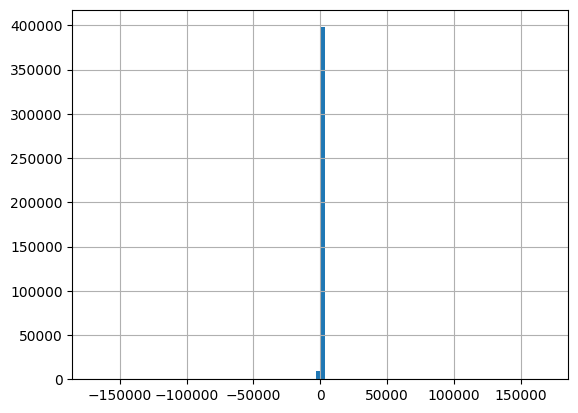

In [16]:
import matplotlib.pyplot as plt

df["Revenue"].hist(bins=100)
plt.show()

In [17]:
max_row = df.loc[[df["Revenue"].idxmax()]]
max_row.head()





,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6


In [18]:
min_row = df.loc[[df["Revenue"].idxmin()]]
min_row.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.6


In [19]:
customer_revenue = df.groupby("Customer ID")["Revenue"].sum()

customer_revenue.describe()

count      4372.000000
mean       1898.463818
std        8219.344627
min       -4287.630000
25%         293.362500
50%         648.075000
75%        1611.725000
max      279489.020000
Name: Revenue, dtype: float64

In [20]:
customer_revenue.sort_values(ascending=False).head(10)


Customer ID
14646.0    279489.02
18102.0    256438.49
17450.0    187482.17
14911.0    132572.62
12415.0    123725.45
14156.0    113384.14
17511.0     88125.38
16684.0     65892.08
13694.0     62653.10
15311.0     59419.34
Name: Revenue, dtype: float64

In [21]:
df = df[~df["Invoice"].str.startswith("C")]
df = df[df["Quantity"] > 0]
df = df[df["Price"] > 0]
df["Customer ID"] = df["Customer ID"].astype(int)
df["Revenue"] = df["Quantity"] * df["Price"]
df["YearMonth"] = df["InvoiceDate"].dt.to_period("M")



In [22]:

order_revenue = df.groupby("Invoice")["Revenue"].sum()
order_revenue.mean()
customer_revenue = df.groupby("Customer ID")["Revenue"].sum()


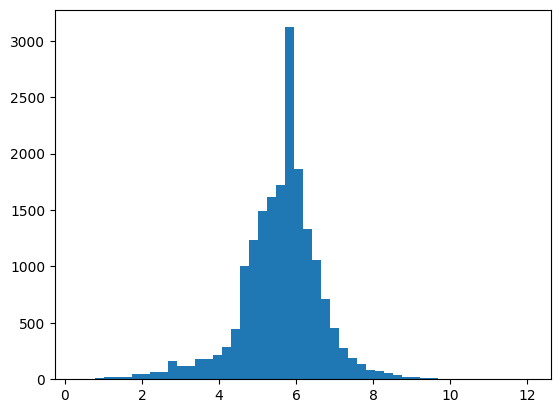

In [23]:
import numpy as np

plt.hist(np.log1p(order_revenue), bins=50)
plt.show()

In [24]:
df["CohortMonth"] = df.groupby("Customer ID")["InvoiceDate"].transform("min").dt.to_period("M")
df["CohortMonth"].head()

0    2010-12
1    2010-12
2    2010-12
3    2010-12
4    2010-12
Name: CohortMonth, dtype: period[M]

In [25]:
df["CohortMonth"] = df.groupby("Customer ID")["InvoiceDate"].transform("min").dt.to_period("M")
df["CohortMonth"].describe()


count      397885
unique         13
top       2010-12
freq       169314
Name: CohortMonth, dtype: object

In [26]:
df["CohortIndex"] = (
    (df["InvoiceDate"].dt.year - df["CohortMonth"].dt.year) * 12
    + (df["InvoiceDate"].dt.month - df["CohortMonth"].dt.month)
)


In [27]:
df["CohortIndex"] = (
    (df["InvoiceDate"].dt.year - df["CohortMonth"].dt.year) * 12
    + (df["InvoiceDate"].dt.month - df["CohortMonth"].dt.month)
)

In [28]:
cohort_counts = df.groupby(['CohortMonth', 'CohortIndex'])['Customer ID'].nunique().reset_index()
cohort_pivot = cohort_counts.pivot(index='CohortMonth', columns='CohortIndex', values='Customer ID')

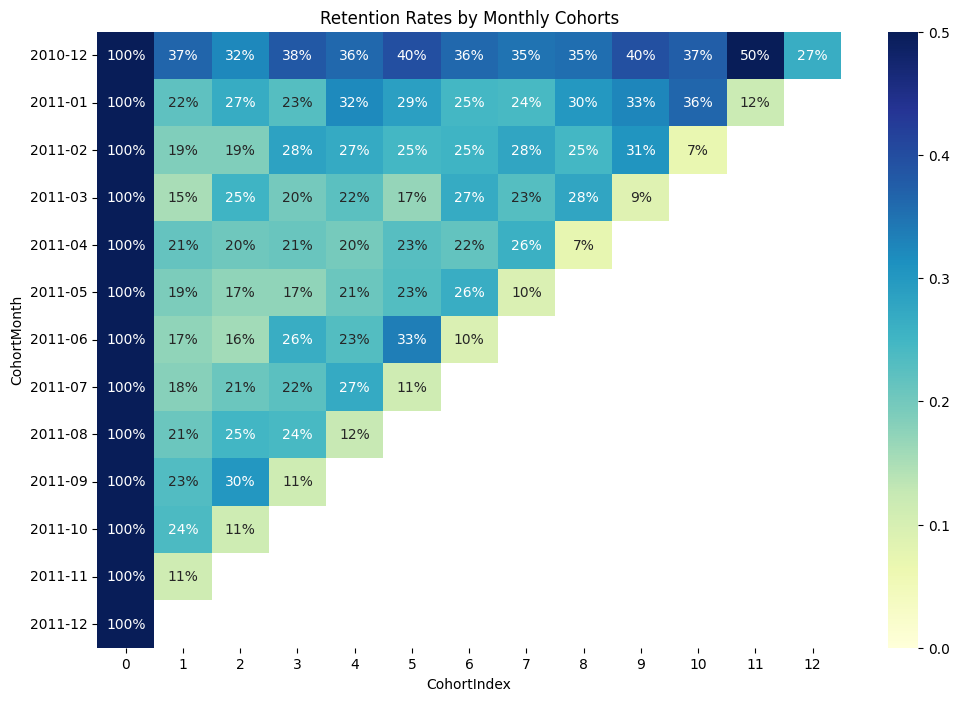

In [29]:
cohort_sizes = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_sizes, axis=0)
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt='.0%', cmap='YlGnBu', vmin=0.0, vmax=0.5)
plt.title('Retention Rates by Monthly Cohorts')
plt.show()

In [30]:
df["CohortMonth"] = df.groupby("Customer ID")["InvoiceDate"]\
    .transform("min")\
    .dt.to_period("M")

In [31]:
df[["Customer ID", "InvoiceDate", "CohortMonth"]].head()

,Customer ID,InvoiceDate,CohortMonth
0,17850,2010-12-01 08:26:00,2010-12
1,17850,2010-12-01 08:26:00,2010-12
2,17850,2010-12-01 08:26:00,2010-12
3,17850,2010-12-01 08:26:00,2010-12
4,17850,2010-12-01 08:26:00,2010-12


In [32]:
df["InvoiceMonth"] = df["InvoiceDate"].dt.to_period("M")

df["CohortIndex"] = (
    (df["InvoiceMonth"].dt.year - df["CohortMonth"].dt.year) * 12 +
    (df["InvoiceMonth"].dt.month - df["CohortMonth"].dt.month)
)

In [33]:
df[["Customer ID", "InvoiceMonth", "CohortMonth", "CohortIndex"]].head(20)

,Customer ID,InvoiceMonth,CohortMonth,CohortIndex
0,17850,2010-12,2010-12,0
1,17850,2010-12,2010-12,0
2,17850,2010-12,2010-12,0
3,17850,2010-12,2010-12,0
4,17850,2010-12,2010-12,0
5,17850,2010-12,2010-12,0
6,17850,2010-12,2010-12,0
7,17850,2010-12,2010-12,0
8,17850,2010-12,2010-12,0
9,13047,2010-12,2010-12,0


In [34]:
cohort_data = df.groupby(["CohortMonth", "CohortIndex"])["Customer ID"]\
    .nunique()\
    .reset_index()

In [35]:
cohort_pivot = cohort_data.pivot(
    index="CohortMonth",
    columns="CohortIndex",
    values="Customer ID"
)

In [36]:
cohort_sizes = cohort_pivot.iloc[:, 0]
retention = cohort_pivot.divide(cohort_sizes, axis=0)

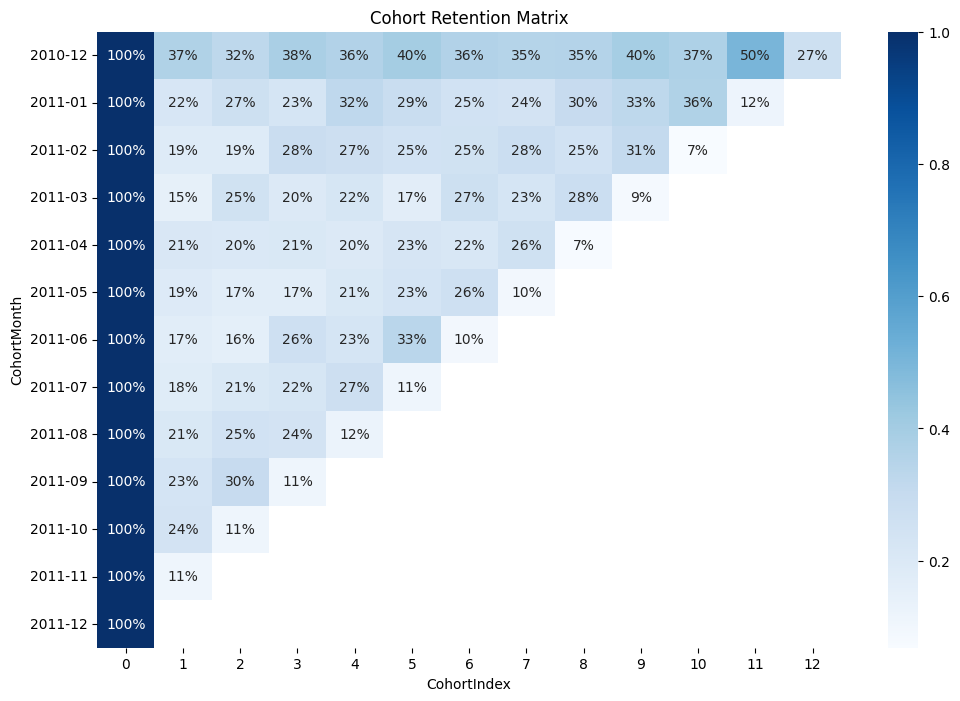

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(retention, annot=True, fmt=".0%", cmap="Blues")
plt.title("Cohort Retention Matrix")
plt.show()

Pareto Analysis (Revenue Concentration)

In [38]:
customer_revenue = (
    df.groupby("Customer ID")["Revenue"]
      .sum()
      .sort_values(ascending=False)
      .reset_index()
)

customer_revenue.columns = ["CustomerID", "TotalRevenue"]
customer_revenue.head(10)

,CustomerID,TotalRevenue
0,14646,280206.02
1,18102,259657.30
2,17450,194550.79
3,16446,168472.50
4,14911,143825.06
5,12415,124914.53
6,14156,117379.63
7,17511,91062.38
8,16029,81024.84
9,12346,77183.60


Cumulative Revenue %

In [39]:
customer_revenue["CumulativeRevenue"] = customer_revenue["TotalRevenue"].cumsum()

total_revenue = customer_revenue["TotalRevenue"].sum()

customer_revenue["CumulativePercent"] = (
    customer_revenue["CumulativeRevenue"] / total_revenue
)

In [40]:
customer_revenue["CustomerRank"] = (
    customer_revenue.index + 1
)

total_customers = len(customer_revenue)

customer_revenue["CustomerPercent"] = (
    customer_revenue["CustomerRank"] / total_customers
)

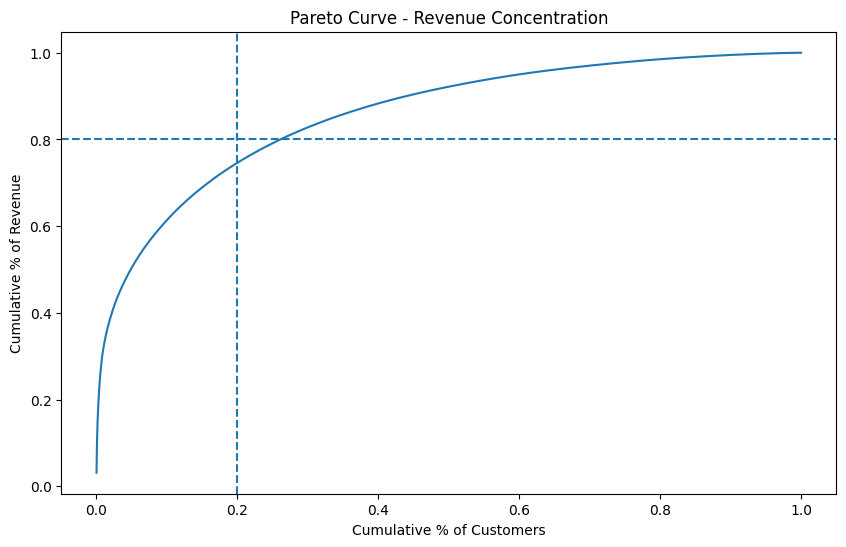

In [41]:

plt.figure(figsize=(10,6))
plt.plot(customer_revenue["CustomerPercent"],
         customer_revenue["CumulativePercent"])

plt.axvline(0.2, linestyle="--")
plt.axhline(0.8, linestyle="--")

plt.xlabel("Cumulative % of Customers")
plt.ylabel("Cumulative % of Revenue")
plt.title("Pareto Curve - Revenue Concentration")
plt.show()

In [42]:
top_20_cutoff = int(0.2 * total_customers)

top_20_revenue = customer_revenue.iloc[:top_20_cutoff]["TotalRevenue"].sum()

top_20_share = top_20_revenue / total_revenue

print("Top 20% revenue share:", top_20_share)

Top 20% revenue share: 0.7459387625067101


RFM segmentation


In [43]:
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)
rfm = df.groupby("Customer ID").agg({
    "InvoiceDate": lambda x: (snapshot_date - x.max()).days,
    "Invoice": "nunique",
    "Revenue": "sum"
}).reset_index()

rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

In [44]:
rfm["R_Score"] = pd.qcut(rfm["Recency"], 4, labels=[4,3,2,1])
rfm["F_Score"] = pd.qcut(rfm["Frequency"].rank(method="first"), 4, labels=[1,2,3,4])
rfm["M_Score"] = pd.qcut(rfm["Monetary"], 4, labels=[1,2,3,4])

In [45]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
0,12346,326,1,77183.60,1,1,4
1,12347,2,7,4310.00,4,4,4
2,12348,75,4,1797.24,2,3,4
3,12349,19,1,1757.55,3,1,4
4,12350,310,1,334.40,1,1,2


In [46]:
rfm["RFM_Score"] = (
    rfm["R_Score"].astype(str) +
    rfm["F_Score"].astype(str) +
    rfm["M_Score"].astype(str)
)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12346,326,1,77183.60,1,1,4,114
1,12347,2,7,4310.00,4,4,4,444
2,12348,75,4,1797.24,2,3,4,234
3,12349,19,1,1757.55,3,1,4,314
4,12350,310,1,334.40,1,1,2,112


In [47]:
def segment(row):
    if row["R_Score"] == 4 and row["F_Score"] >= 3:
        return "Champions"
    elif row["R_Score"] >= 3 and row["F_Score"] >= 2:
        return "Loyal"
    elif row["R_Score"] <= 2 and row["F_Score"] >= 3:
        return "At Risk"
    else:
        return "Others"

rfm["Segment"] = rfm.apply(segment, axis=1)

rfm.head()

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346,326,1,77183.60,1,1,4,114,Others
1,12347,2,7,4310.00,4,4,4,444,Champions
2,12348,75,4,1797.24,2,3,4,234,At Risk
3,12349,19,1,1757.55,3,1,4,314,Others
4,12350,310,1,334.40,1,1,2,112,Others


churn dataset creation

In [48]:
rfm["Churn"] = (rfm["Recency"] > 90).astype(int)
features = rfm[[
    "Recency",
    "Frequency",
    "Monetary"
]]

target = rfm["Churn"]

In [49]:
print(f"Top 20% Revenue Share: {top_20_share:.2%}")
revenue_concentration = top_20_share

Top 20% Revenue Share: 74.59%


In [50]:
# Count how many customers are in each segment
segment_counts = rfm["Segment"].value_counts()

# Convert to percentages
segment_percentage = rfm["Segment"].value_counts(normalize=True) * 100

print("--- Segment Distribution ---")
print(segment_counts)
print("\n--- Segment Percentage ---")
print(segment_percentage.round(2).astype(str) + '%')

--- Segment Distribution ---
Segment
Others       1763
Loyal        1038
Champions     891
At Risk       646
Name: count, dtype: int64

--- Segment Percentage ---
Segment
Others       40.64%
Loyal        23.93%
Champions    20.54%
At Risk      14.89%
Name: proportion, dtype: str


In [51]:
# Since 'Churn' is 1 for churned and 0 for active, the mean is the churn rate
churn_rate = rfm["Churn"].mean()

print(f"Overall Churn Rate: {churn_rate:.2%}")

Overall Churn Rate: 33.40%


C:\Users\adity\AppData\Local\Temp\ipykernel_18528\186508155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='Segment', ax=ax[0], palette='viridis', order=rfm['Segment'].value_counts().index)


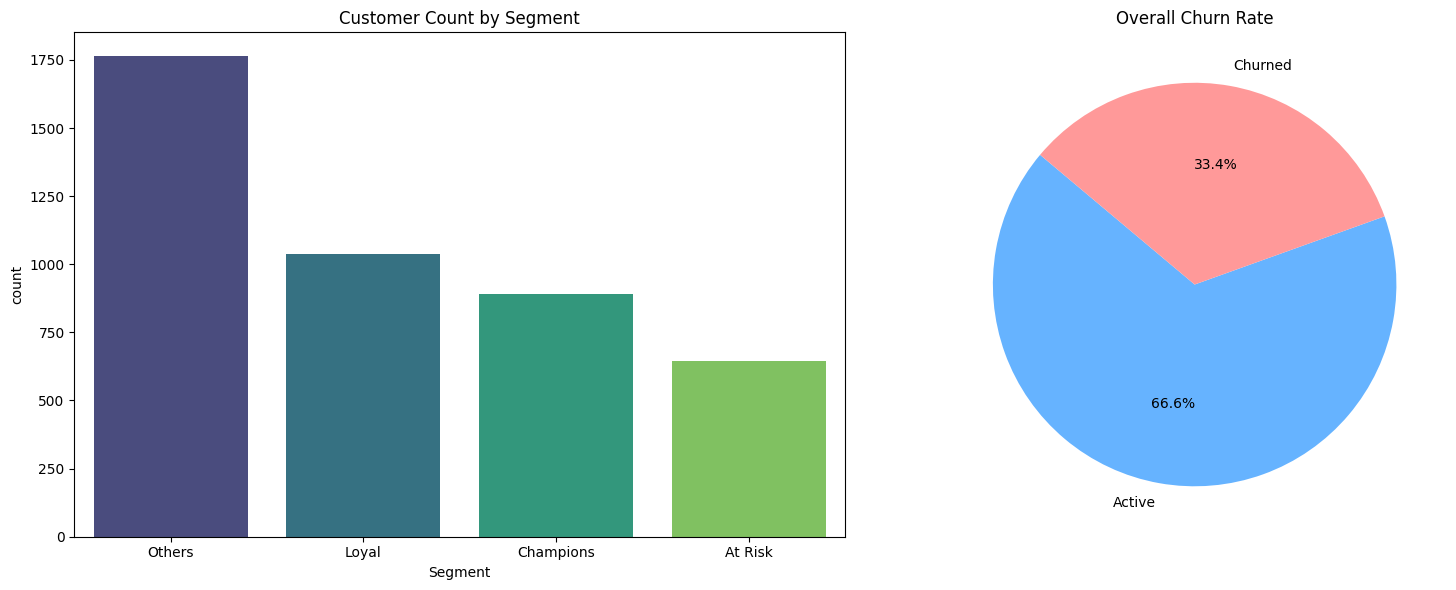

In [52]:
# Create a figure with two plots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# 1. Segment Distribution Plot
sns.countplot(data=rfm, x='Segment', ax=ax[0], palette='viridis', order=rfm['Segment'].value_counts().index)
ax[0].set_title('Customer Count by Segment')

# 2. Churn vs Active Pie Chart
churn_labels = ['Active', 'Churned']
churn_sizes = rfm['Churn'].value_counts().sort_index() # 0 is active, 1 is churned
ax[1].pie(churn_sizes, labels=churn_labels, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
ax[1].set_title('Overall Churn Rate')

plt.tight_layout()
plt.show()

In [53]:
summary_stats = {
    "Metric": ["Top 20% Rev Share", "Total Customers", "Overall Churn Rate"],
    "Value": [f"{top_20_share:.2%}", len(rfm), f"{churn_rate:.2%}"]
}
import pandas as pd
print(pd.DataFrame(summary_stats))

               Metric   Value
0   Top 20% Rev Share  74.59%
1     Total Customers    4338
2  Overall Churn Rate  33.40%


In [54]:
churned_revenue = rfm[rfm["Churn"] == 1]["Monetary"].sum()
total_revenue = rfm["Monetary"].sum()

churned_revenue_share = churned_revenue / total_revenue

print(churned_revenue_share)

0.11617337361637116


In [55]:
purchase_gap = (
    df.sort_values(["Customer ID", "InvoiceDate"])
      .groupby("Customer ID")["InvoiceDate"]
      .diff()
)

avg_gap = purchase_gap.dropna().mean()
print(avg_gap)

1 days 10:35:43.911858


Churn Rate per Segment

In [56]:
segment_churn = (
    rfm.groupby("Segment")
       .agg(
           Customers=("CustomerID", "count"),
           ChurnRate=("Churn", "mean"),
           AvgMonetary=("Monetary", "mean")
       )
       .reset_index()
)

segment_churn["ChurnRate"] = segment_churn["ChurnRate"] * 100

segment_churn

,Segment,Customers,ChurnRate,AvgMonetary
0,At Risk,646,54.334365,1611.350915
1,Champions,891,0.000000,5557.325421
2,Loyal,1038,0.000000,1984.252284
3,Others,1763,62.280204,487.386496


In [57]:
churned_segment_revenue = (
    rfm[rfm["Churn"] == 1]
       .groupby("Segment")["Monetary"]
       .sum()
       .reset_index()
)

churned_segment_revenue.columns = ["Segment", "ChurnedRevenue"]

churned_segment_revenue

,Segment,ChurnedRevenue
0,At Risk,498738.880
1,Others,536531.531


In [58]:
segment_total_revenue = (
    rfm.groupby("Segment")["Monetary"]
       .sum()
       .reset_index()
)

segment_total_revenue.columns = ["Segment", "TotalRevenue"]

segment_total_revenue

,Segment,TotalRevenue
0,At Risk,1040932.691
1,Champions,4951576.950
2,Loyal,2059653.871
3,Others,859262.392


In [59]:
segment_analysis = segment_churn.merge(
    segment_total_revenue,
    on="Segment"
).merge(
    churned_segment_revenue,
    on="Segment",
    how="left"
)

segment_analysis["ChurnedRevenue"] = segment_analysis["ChurnedRevenue"].fillna(0)

segment_analysis

,Segment,Customers,ChurnRate,AvgMonetary,TotalRevenue,ChurnedRevenue
0,At Risk,646,54.334365,1611.350915,1040932.691,498738.880
1,Champions,891,0.000000,5557.325421,4951576.950,0.000
2,Loyal,1038,0.000000,1984.252284,2059653.871,0.000
3,Others,1763,62.280204,487.386496,859262.392,536531.531


In [ ]:
import os
output_path = r"C:\Users\adity\OneDrive\Documents\gcc-revenue-intelligence\data\processed\\"


df.to_csv(f"{output_path}processed_transactions.csv", index=False)


rfm.to_csv(f"{output_path}customer_segments.csv", index=False)


segment_analysis.to_csv(f"{output_path}segment_summary.csv", index=False)

print(r"Files exported successfully to C:\Users\adity\OneDrive\Documents\gcc-revenue-intelligence\data\processed")

Files exported successfully to C:\Users\adity\OneDrive\Documents\gcc-revenue-intelligence\data\processed
